In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pylab as plt
from glob import glob
import seaborn as sns
from skimage.io import imread
import os
import cPickle as pickle
import scipy.stats.mstats

In [3]:
plt.gray();

In [4]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [5]:
dirs = {1.00:'/home/makov/diskmnt/big/yaivan/noisy_data/04. FlatField (Av=3)/01. Raw 1.00T/',
        0.66:'/home/makov/diskmnt/big/yaivan/noisy_data/04. FlatField (Av=3)/02. Raw 0.66T/',
        0.33:'/home/makov/diskmnt/big/yaivan/noisy_data/04. FlatField (Av=3)/03. Raw 0.33T/',
        0.17:'/home/makov/diskmnt/big/yaivan/noisy_data/04. FlatField (Av=3)/04. Raw 0.17T/',
        0.10:'/home/makov/diskmnt/big/yaivan/noisy_data/04. FlatField (Av=3)/05. Raw 0.1T/',
       }

In [37]:
# if os.path.exists ('stat_data.pkl'):
#     raise RuntimeError('Please delete \"stat_data.pkl\" or comment this block')
    
out_res = {}
for expose, d in dirs.items():
    files = glob(os.path.join(d,'*.tif'))
    files = sorted(files)[:-1]
    n_files = len(files)
    print(d, n_files)
    
    data_sample = imread(files[0])
    disp_vol = np.zeros((n_files, data_sample.shape[0], data_sample.shape[1]), dtype='float32')
    
    print('loading data')
    for idf, f in log_progress(list(enumerate(files))):
        data = imread(f)
        disp_vol[idf] = data
           
    out_res[expose] = {}
    print('calculating std')
    data_std = np.std(disp_vol, axis=0)
    out_res[expose]['data_std'] = data_std
    
    print('calculating mean')
    data_mean = np.mean(disp_vol, axis=0)
    out_res[expose]['data_mean'] = data_mean
    
#     print('calculating norm_test')
#     a, b = scipy.stats.mstats.normaltest(disp_vol, axis=0)
#     out_res[expose]['norm_test'] = {'a':a, 'b': b}
    
    print('prepearing normalized array')
    dvn = np.expand_dims(np.expand_dims(disp_vol.sum(axis=-1).sum(axis=1),1),1)/np.sum(disp_vol[0])
    disp_vol /= dvn
    dvn = np.squeeze(dvn)
    out_res[expose]['norm_curve'] = dvn
    
    print('calculating norm std')
    data_std = np.std(disp_vol, axis=0)
    out_res[expose]['data_norm_std'] = data_std
    
    print('calculating norm mean')
    data_mean = np.mean(disp_vol, axis=0)
    out_res[expose]['data_norm_mean'] = data_mean
    
#     print('calculating norm norm_test')
#     a, b = scipy.stats.mstats.normaltest(disp_vol, axis=0)
#     out_res[expose]['norm_norm_test'] = {'a':a, 'b': b}
    print(out_res[expose].keys())
    del disp_vol
    
    with open('stat_data.pkl','w') as pkf:
        pickle.dump(out_res, pkf)
    

('/home/makov/diskmnt/big/yaivan/noisy_data/04. FlatField (Av=3)/04. Raw 0.17T/', 204)
loading data


calculating std
calculating mean
prepearing normalized array
calculating norm std
calculating norm mean
['data_norm_std', 'norm_curve', 'data_mean', 'data_std', 'data_norm_mean']
('/home/makov/diskmnt/big/yaivan/noisy_data/04. FlatField (Av=3)/01. Raw 1.00T/', 204)
loading data


calculating std
calculating mean
prepearing normalized array
calculating norm std
calculating norm mean
['data_norm_std', 'norm_curve', 'data_mean', 'data_std', 'data_norm_mean']
('/home/makov/diskmnt/big/yaivan/noisy_data/04. FlatField (Av=3)/03. Raw 0.33T/', 204)
loading data


calculating std
calculating mean
prepearing normalized array
calculating norm std
calculating norm mean
['data_norm_std', 'norm_curve', 'data_mean', 'data_std', 'data_norm_mean']
('/home/makov/diskmnt/big/yaivan/noisy_data/04. FlatField (Av=3)/05. Raw 0.1T/', 204)
loading data


calculating std
calculating mean
prepearing normalized array
calculating norm std
calculating norm mean
['data_norm_std', 'norm_curve', 'data_mean', 'data_std', 'data_norm_mean']
('/home/makov/diskmnt/big/yaivan/noisy_data/04. FlatField (Av=3)/02. Raw 0.66T/', 204)
loading data


calculating std
calculating mean
prepearing normalized array
calculating norm std
calculating norm mean
['data_norm_std', 'norm_curve', 'data_mean', 'data_std', 'data_norm_mean']


In [31]:
with open('stat_data.pkl','r') as pkf:
    out_res = pickle.load(pkf)

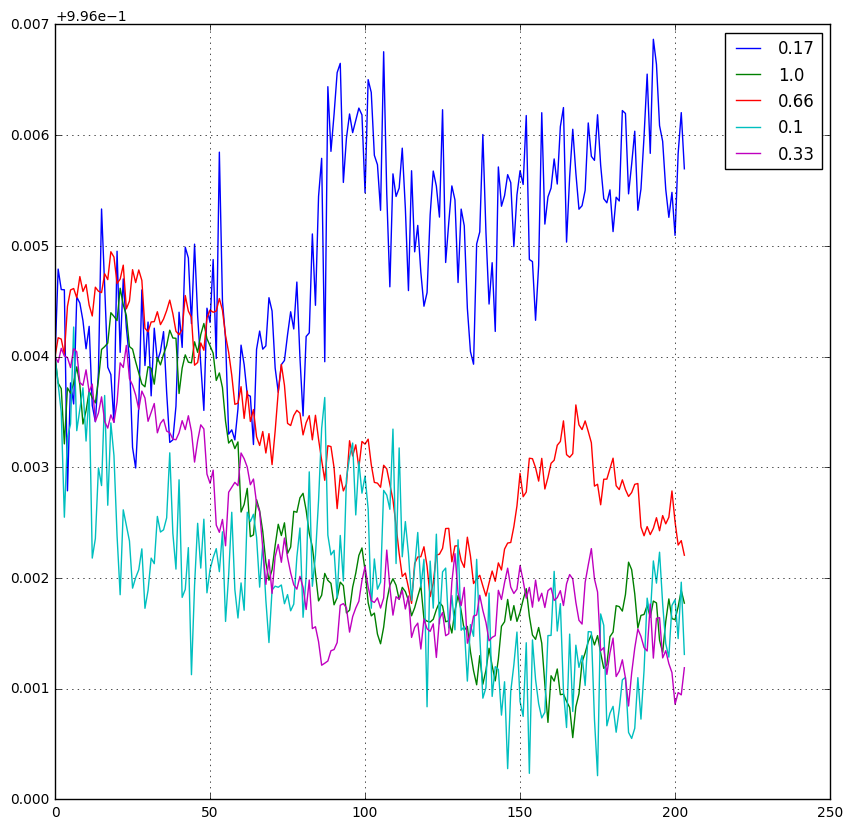

In [39]:
plt.figure(figsize=(10,10))
for time in out_res.keys():
    plt.plot(out_res[time]['norm_curve'], label=time)
plt.legend(loc=0)
plt.grid(True)
plt.show()

In [41]:
out_res[out_res.keys()[0]].keys()

['data_norm_std', 'norm_curve', 'data_mean', 'data_std', 'data_norm_mean']

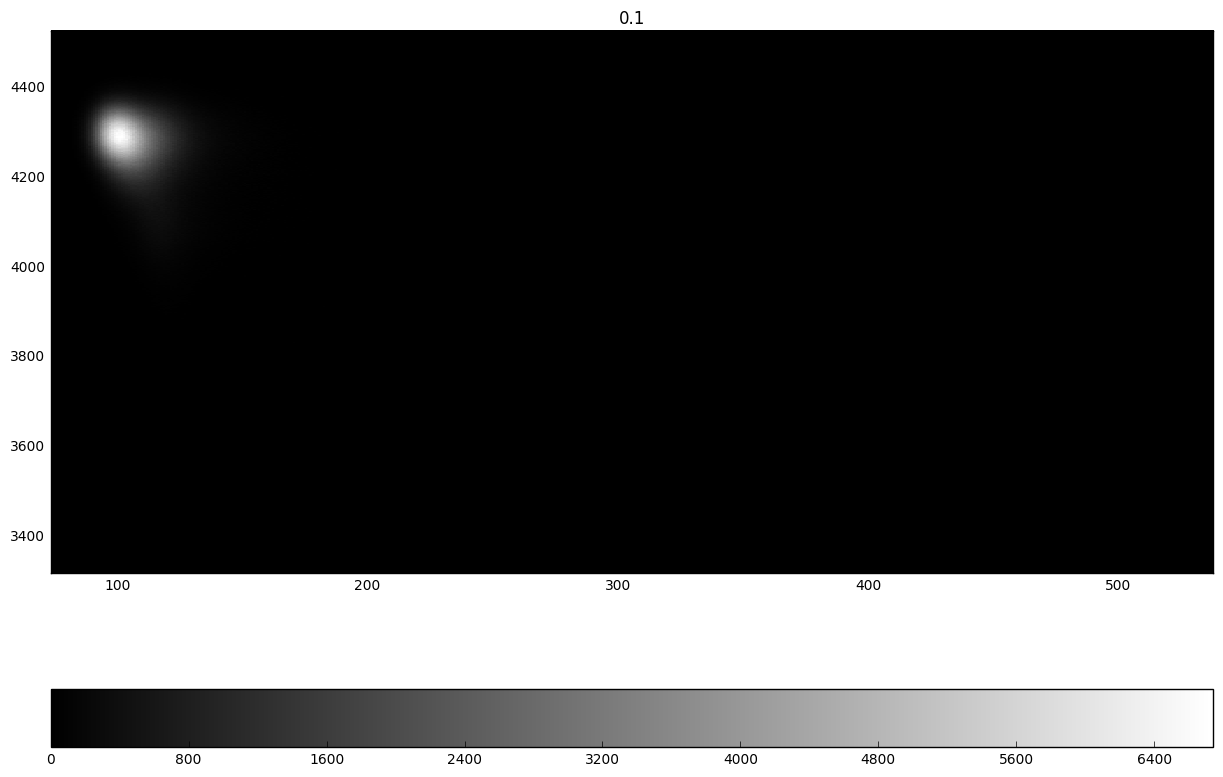

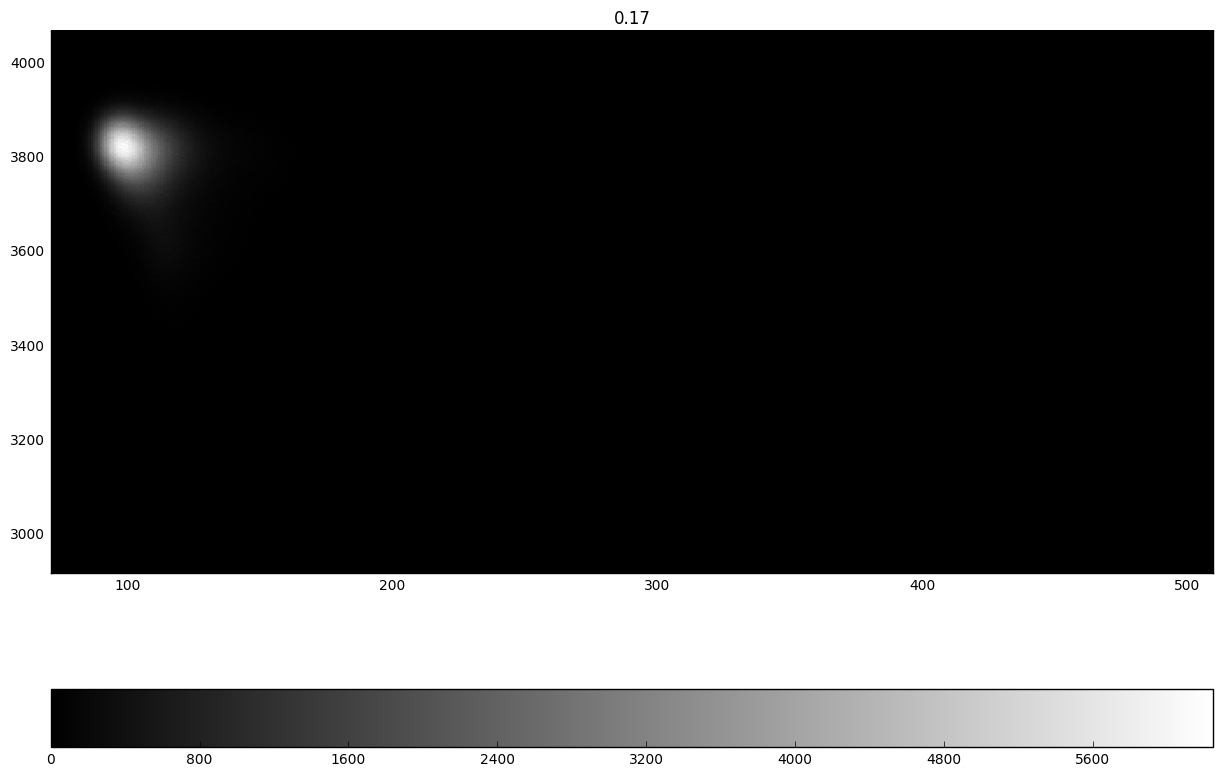

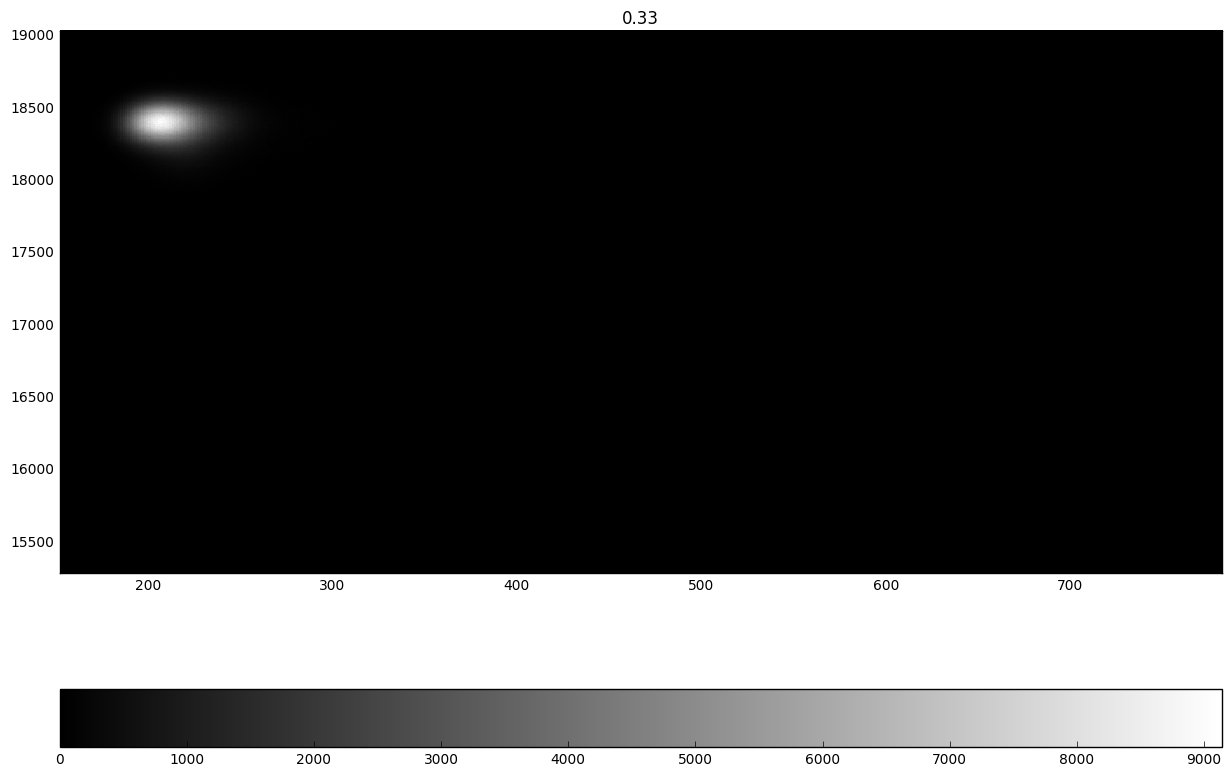

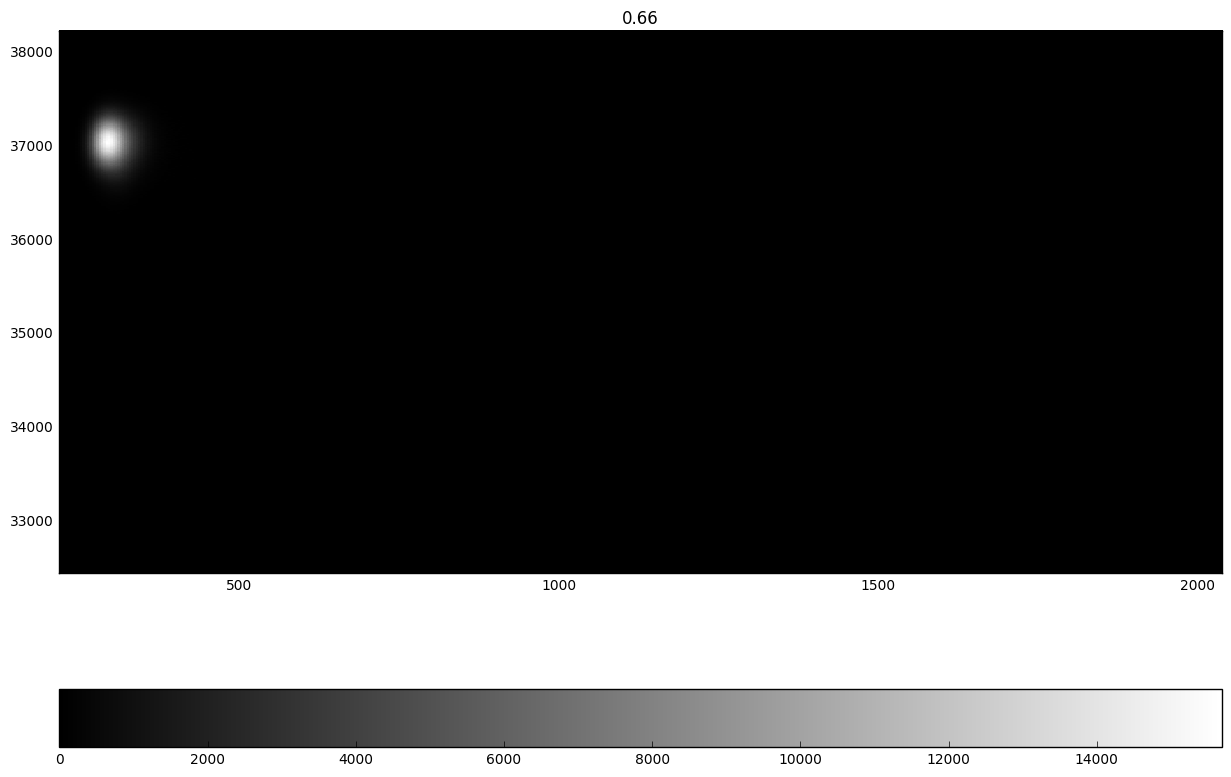

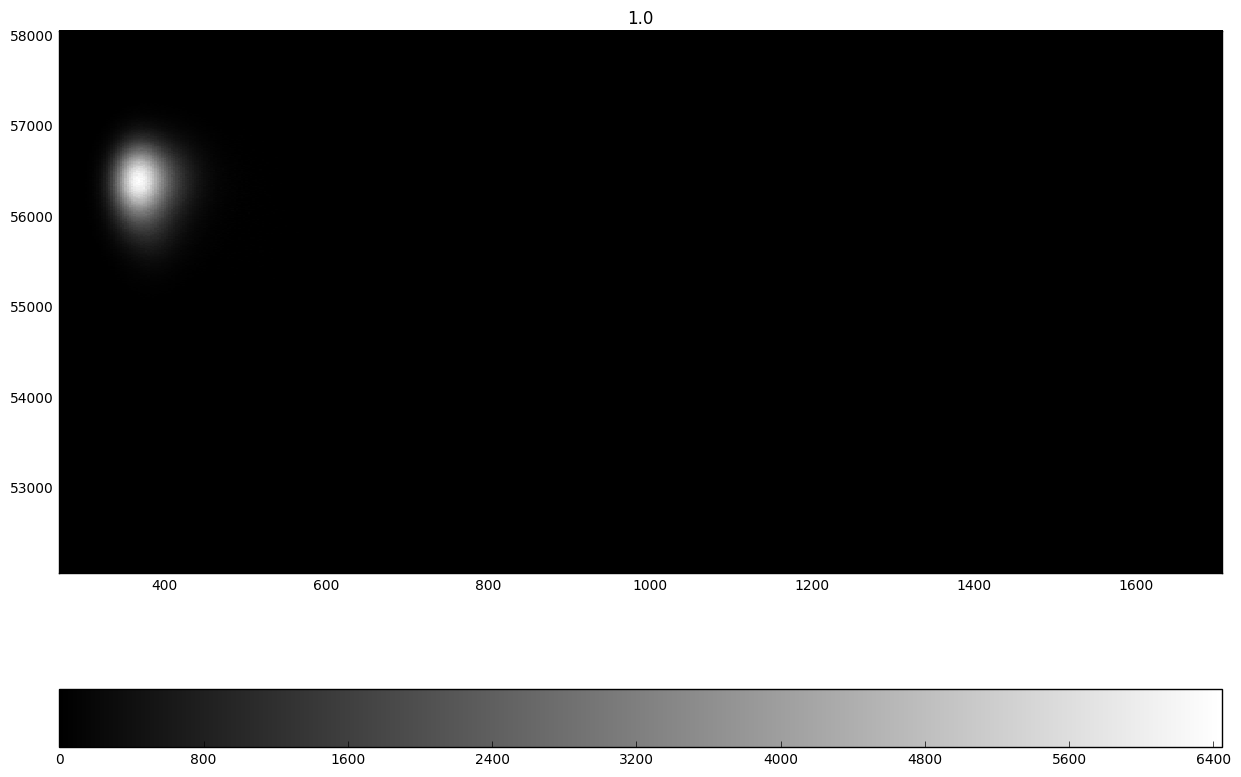

In [60]:
for time in sorted(out_res.keys()):
    plt.figure(figsize=(15,10))
#     plt.subplot(121)
    plt.hist2d(out_res[time]['data_std'].ravel(), out_res[time]['data_mean'].ravel(),
              bins=(500,500))
    plt.title(time)
    plt.colorbar(orientation='horizontal')
    
#     plt.subplot(122)
#     plt.hist2d(out_res[time]['data_norm_std'].ravel(),out_res[time]['data_norm_mean'].ravel(),
#               bins=(500,500))
#     plt.title(time)
#     plt.colorbar(orientation='horizontal')
    
    plt.show()

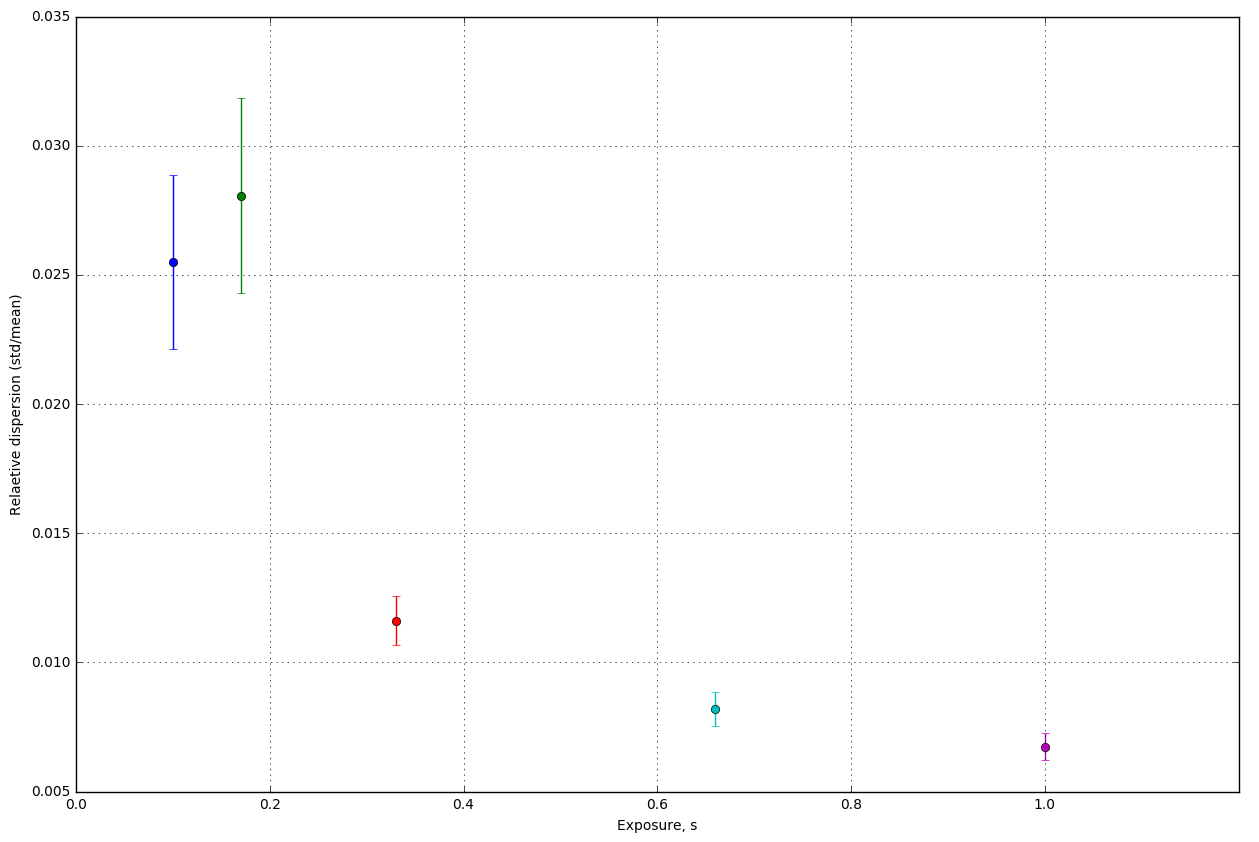

In [66]:
plt.figure(figsize=(15,10))
for time in sorted(out_res.keys()):
    
    k_m = np.mean(out_res[time]['data_std'].ravel()/out_res[time]['data_mean'].ravel())
    k_s = np.std(out_res[time]['data_std'].ravel()/out_res[time]['data_mean'].ravel())
    plt.errorbar(time, k_m, yerr=k_s, fmt='o')
    
#     plt.subplot(122)
#     plt.hist2d(out_res[time]['data_norm_std'].ravel(),out_res[time]['data_norm_mean'].ravel(),
#               bins=(500,500))
#     plt.title(time)
#     plt.colorbar(orientation='horizontal')

plt.xlabel('Exposure, s')
plt.ylabel('Relaetive dispersion (std/mean)')
plt.xlim([0,1.2])
plt.grid(True)
plt.show()

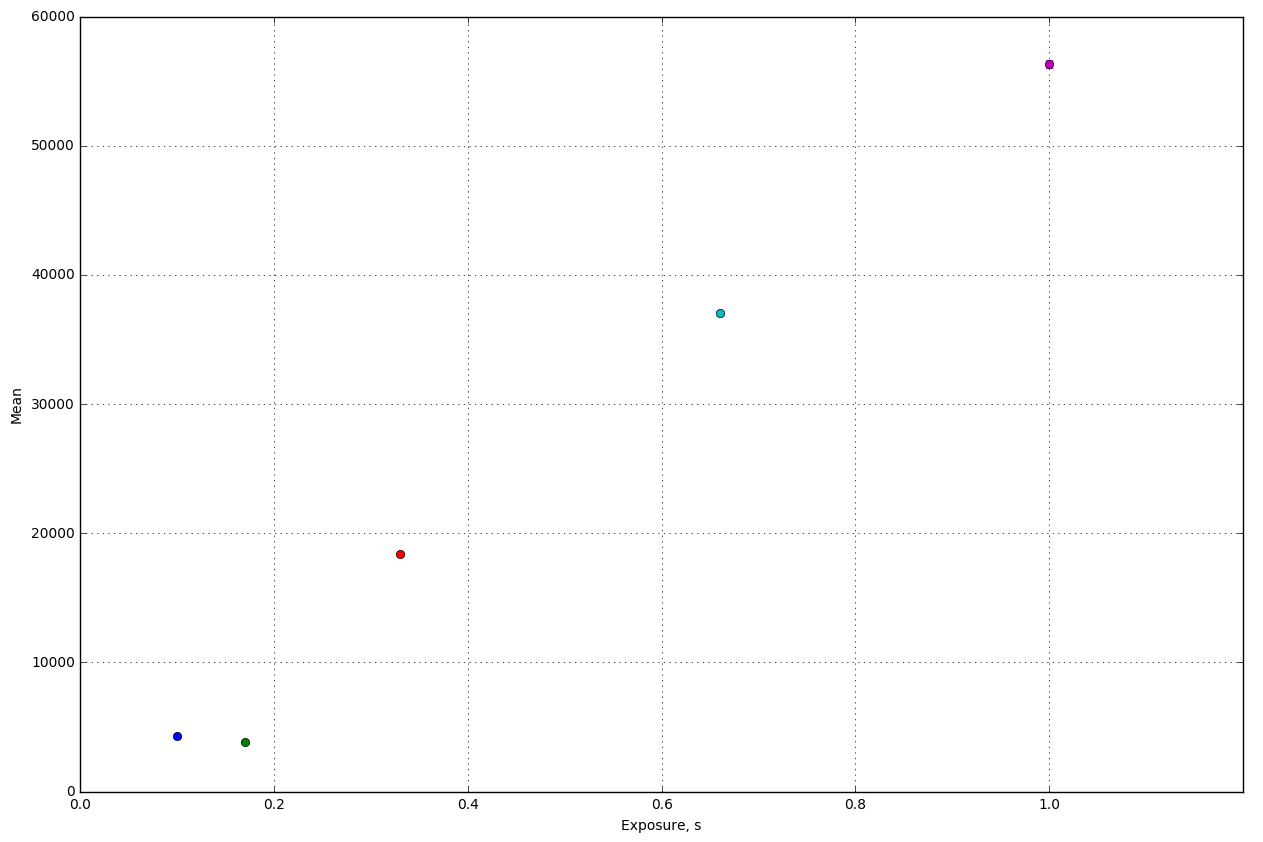

In [67]:
plt.figure(figsize=(15,10))
for time in sorted(out_res.keys()):
    
    k_m = np.mean(out_res[time]['data_mean'].ravel())
    k_s = np.std(out_res[time]['data_mean'].ravel())
    plt.errorbar(time, k_m, yerr=k_s, fmt='o')
    
#     plt.subplot(122)
#     plt.hist2d(out_res[time]['data_norm_std'].ravel(),out_res[time]['data_norm_mean'].ravel(),
#               bins=(500,500))
#     plt.title(time)
#     plt.colorbar(orientation='horizontal')

plt.xlabel('Exposure, s')
plt.ylabel('Mean')
plt.xlim([0,1.2])
plt.grid(True)
plt.show()

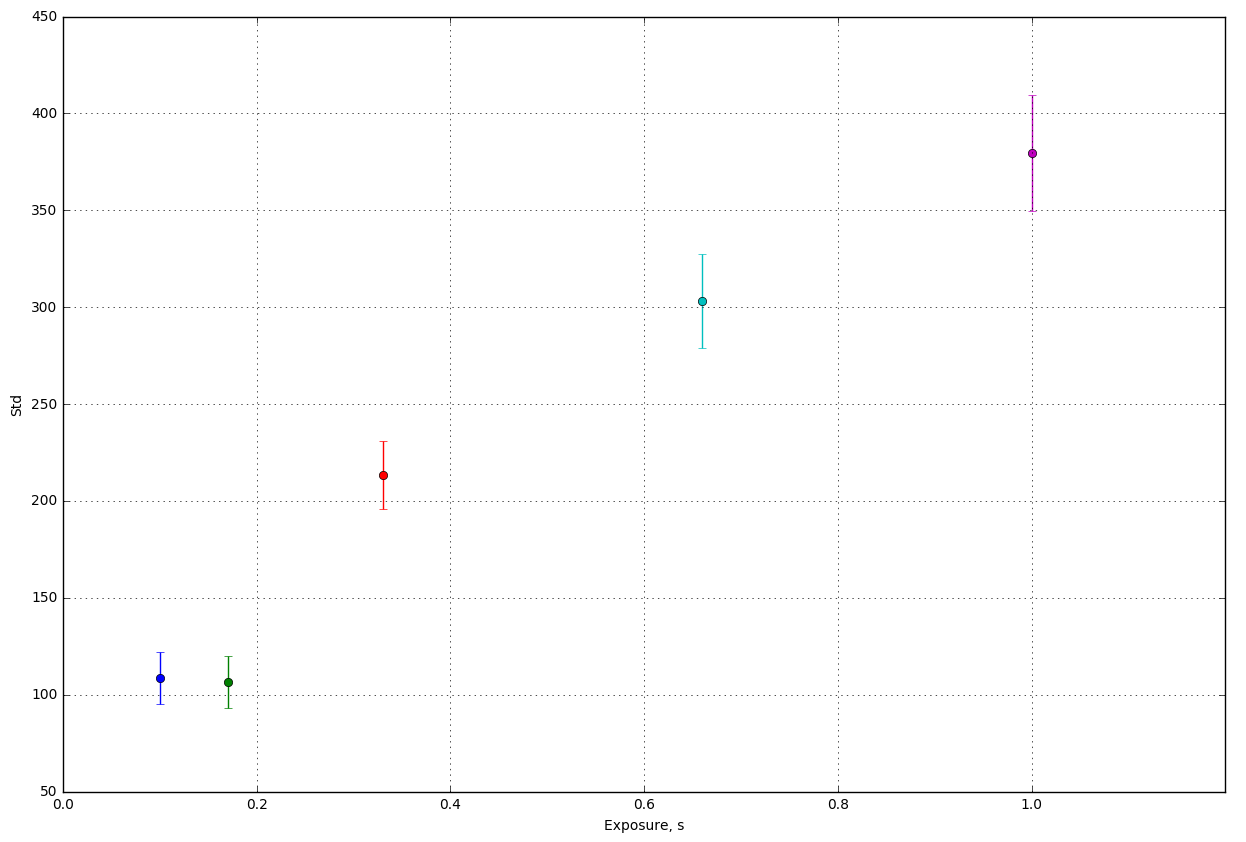

In [68]:
plt.figure(figsize=(15,10))
for time in sorted(out_res.keys()):
    
    k_m = np.mean(out_res[time]['data_std'].ravel())
    k_s = np.std(out_res[time]['data_std'].ravel())
    plt.errorbar(time, k_m, yerr=k_s, fmt='o')
    
#     plt.subplot(122)
#     plt.hist2d(out_res[time]['data_norm_std'].ravel(),out_res[time]['data_norm_mean'].ravel(),
#               bins=(500,500))
#     plt.title(time)
#     plt.colorbar(orientation='horizontal')

plt.xlabel('Exposure, s')
plt.ylabel('Std')
plt.xlim([0,1.2])
plt.grid(True)
plt.show()

In [50]:
out_res[time]['data_mean'for time in sorted(out_res.keys()):
    plt.figure(figsize=(15,10))
#     plt.subplot(121)
    plt.hist2d(out_res[time]['data_std'].ravel(), out_res[time]['data_mean'].ravel(),
              bins=(500,500))
    plt.title(time)
    plt.colorbar(orientation='horizontal')
    
#     plt.subplot(122)
#     plt.hist2d(out_res[time]['data_norm_std'].ravel(),out_res[time]['data_norm_mean'].ravel(),
#               bins=(500,500))
#     plt.title(time)
#     plt.colorbar(orientation='horizontal')
    
    plt.show()].ravel().shape

(8384000,)

In [ ]:
for time in out_res.keys():
    rel_std = out_res[time]['norm_curve']
    plt.figure(figsize=(10,10))
    plt.imshow()

In [12]:
out_res[out_res.keys()[0]].keys()

['norm_test', 'norm_curve', 'data_std', 'data_norm_std', 'norm norm_test']

In [143]:
dvn = np.sum(disp_vol[0])
disp_vol_norm = disp_vol/np.expand_dims(np.expand_dims(disp_vol.sum(axis=-1).sum(axis=1),1),1)*dvn

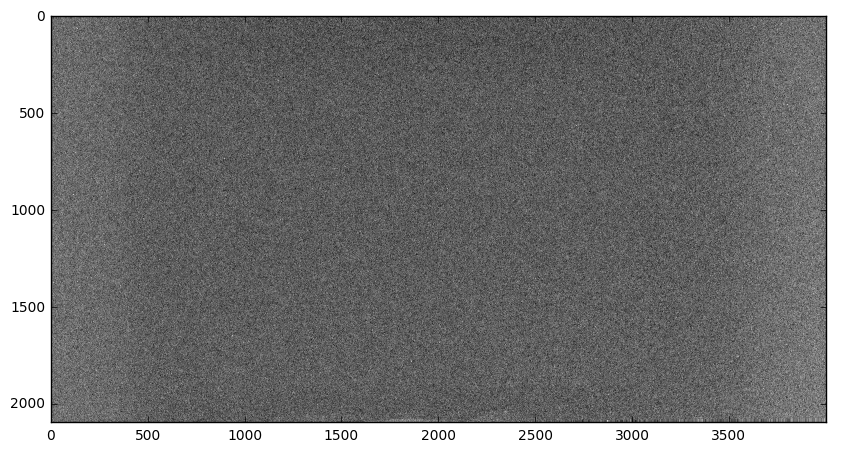

In [147]:
plt.figure(figsize=(10,12))
plt.imshow(disp_vol[0], interpolation='nearest', cmap=plt.cm.gray_r)
plt.show()

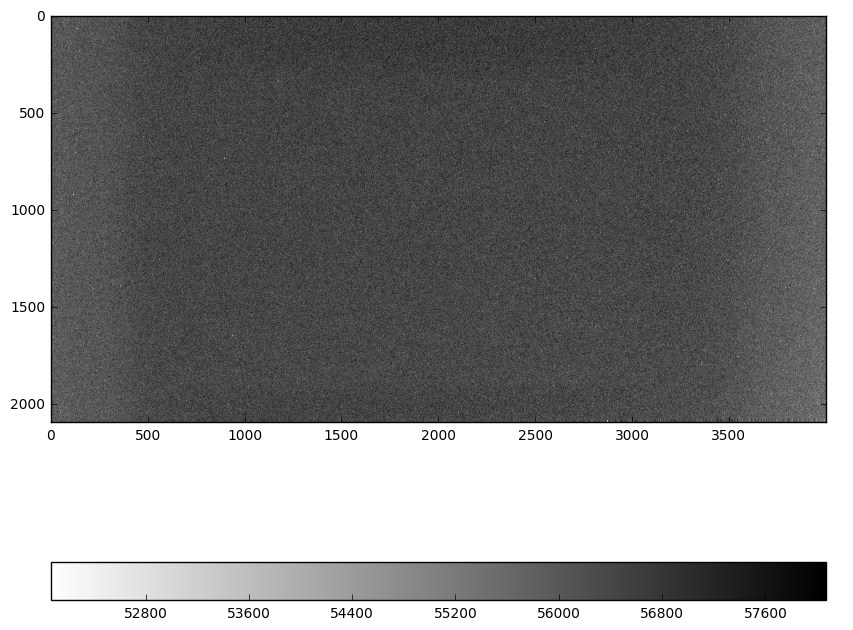

In [148]:
data_mean = np.mean(disp_vol, axis=0)
# data_norm_mean = np.mean(disp_vol_norm, axis=0)
plt.figure(figsize=(10,12))
# plt.subplot(121)
plt.imshow(data_mean, interpolation='nearest', cmap=plt.cm.gray_r)
plt.colorbar(orientation='horizontal')
# plt.subplot(122)
# plt.imshow(data_norm_mean, interpolation='nearest')
# plt.colorbar(orientation='horizontal')
plt.show()

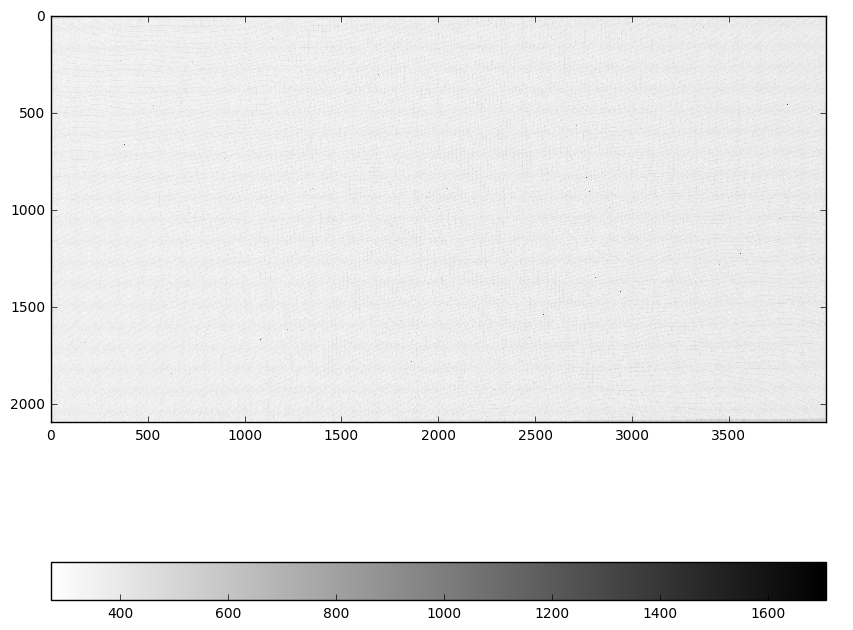

In [149]:
data_std = np.std(disp_vol, axis=0)
# data_norm_std = np.std(disp_vol_norm, axis=0)
plt.figure(figsize=(10,12))
# plt.subplot(121)
plt.imshow(data_std, interpolation='nearest', cmap=plt.cm.gray_r)
plt.colorbar(orientation='horizontal')

# plt.subplot(122)
# plt.imshow(data_norm_std, interpolation='nearest')
# plt.colorbar(orientation='horizontal')

plt.show()

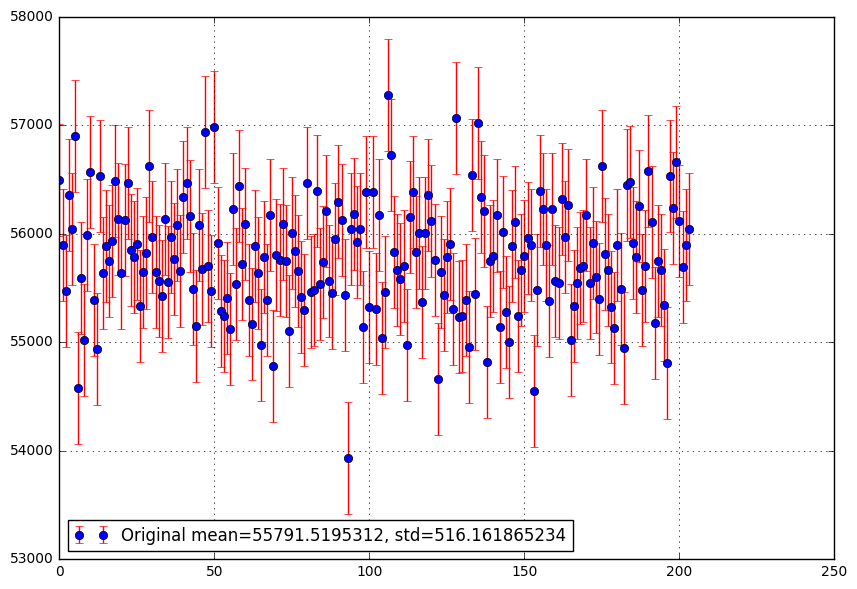

In [156]:
plt.figure(figsize=(10,7))
for i in range(0,500,500):
    for j in range(0,500,500):
        plt.errorbar(np.arange(disp_vol.shape[0]), disp_vol[:,i,j],
                     yerr = data_std[i,j], fmt='o', ecolor='r',
                     label = 'Original mean={}, std={}'.format(
                        np.mean(disp_vol[:,i,j]),
                        np.std(disp_vol[:,i,j])))
#         plt.plot(disp_vol_norm[:,i,j], label = 'Norm mean={}, std={}'.format(
#             np.mean(disp_vol_norm[:,i,j]),
#             np.std(disp_vol_norm[:,i,j])))
plt.grid(True)
plt.legend(loc=0)
plt.show()

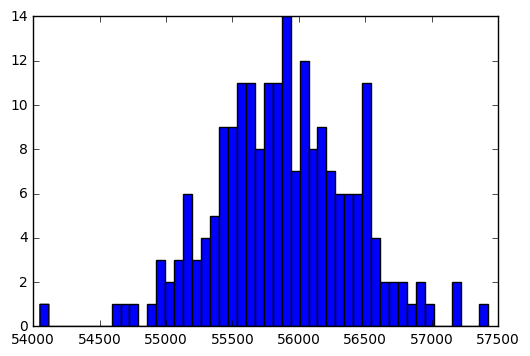

In [157]:
plt.hist(disp_vol_norm[:,0,0], bins=50);

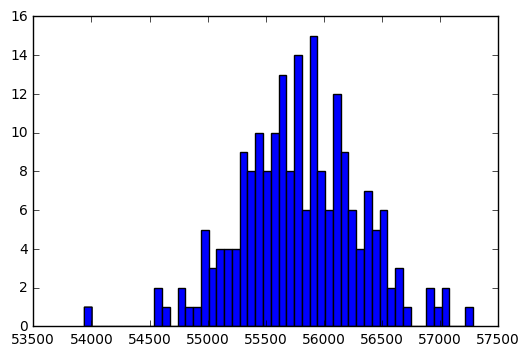

In [158]:
plt.hist(disp_vol[:,0,0], bins=50);

In [ ]:
plt.hist(data_std[::1000]/data_mean[::1000], bins=50);

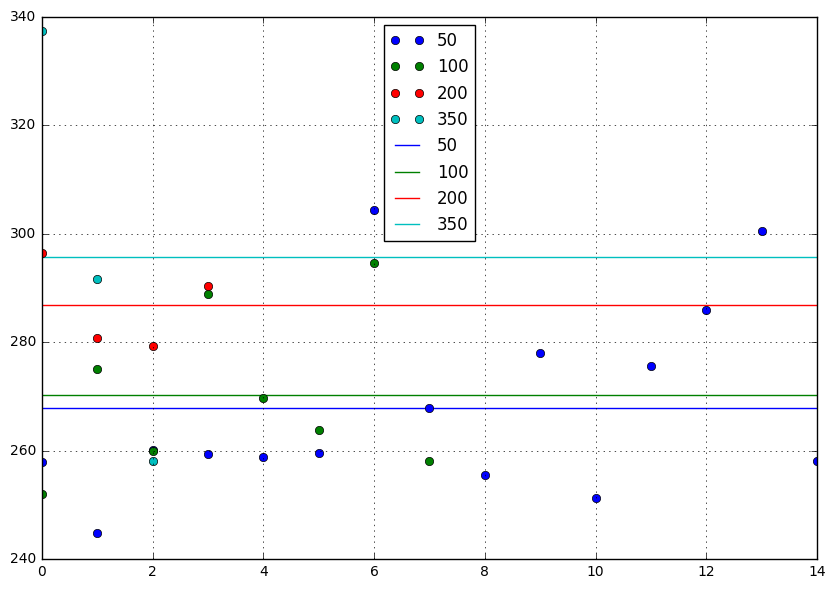

In [127]:
data_set = disp_vol[:,10,10]
plt.figure(figsize=(10,7))

for step in [50,100,200, 350]:
    res = []
    for d in range(0,len(data_set), step):
        disp = np.std(data_set[d:d+step])
        res.append(disp)

    base_line = plt.plot(res, 'o', label = step)
    plt.hlines(np.mean(res), 0, len(data_set)//50, colors=base_line[0].get_color(), label = step)
    
plt.grid(True)
plt.legend(loc=0)
plt.show()

In [93]:
for i in np.linspace(0, disp_vol.shape[0],10):
    print(i)
    d = np.std(disp_vol[int(i): int(i+disp_vol.shape[0]/10)], axis=0)
    plt.imsave('{}.png'.format(int(i)), d, cmap=plt.cm.gray_r)

0.0
80.1111111111
160.222222222
240.333333333
320.444444444
400.555555556
480.666666667
560.777777778
640.888888889
721.0


In [94]:
import scipy.stats.mstats

In [108]:
a, b = scipy.stats.mstats.normaltest(disp_vol, axis=0)

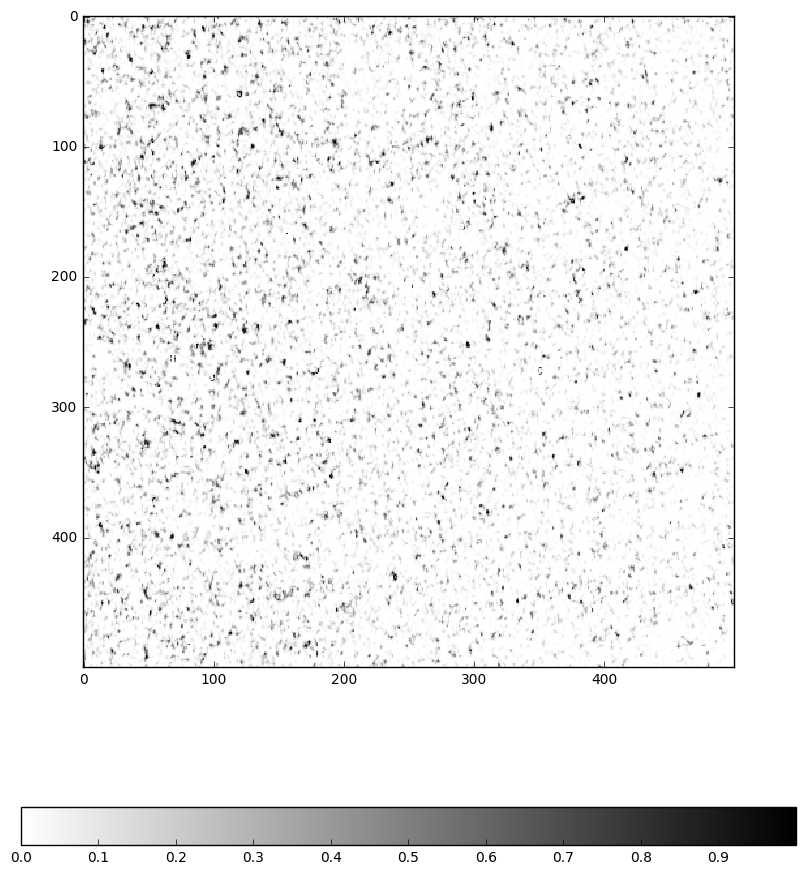

In [109]:
plt.figure(figsize=(10,12))

plt.imshow(b, interpolation='nearest', cmap=plt.cm.gray_r)
plt.colorbar(orientation='horizontal')


plt.show()